In [44]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

## Create necessary classes and functions

Create class to handle "cities"

In [45]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

Create a fitness function

In [46]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

## Create our initial population

Route generator

In [47]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    print('route',route)
    return route

Create first "population" (list of routes)

In [48]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    print('population',population)
    return population

## Create the genetic algorithm

Rank individuals

In [49]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

Create a selection function that will be used to make the list of parent routes

In [50]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

Create mating pool

In [51]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

Create a crossover function for two parents to create one child

In [52]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

Create function to run crossover over full mating pool

In [53]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

Create function to mutate a single route

In [54]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

Create function to run mutation over entire population

In [55]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Put all steps together to create the next generation

In [56]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

Final step: create the genetic algorithm

In [57]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

## Running the genetic algorithm

Create list of cities

In [58]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Run the genetic algorithm

In [59]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

route [(168,152), (192,50), (93,127), (128,83), (94,54), (93,189), (15,119), (60,189), (152,45), (9,191), (9,96), (176,190), (42,41), (97,37), (15,188), (31,86), (87,45), (59,3), (66,127), (67,77), (40,42), (41,198), (54,30), (70,89), (110,66)]
route [(54,30), (176,190), (128,83), (40,42), (42,41), (41,198), (110,66), (94,54), (97,37), (59,3), (60,189), (31,86), (93,127), (66,127), (9,96), (9,191), (192,50), (168,152), (87,45), (93,189), (70,89), (67,77), (15,188), (152,45), (15,119)]
route [(42,41), (31,86), (97,37), (70,89), (168,152), (54,30), (59,3), (9,191), (15,119), (87,45), (67,77), (9,96), (192,50), (60,189), (94,54), (41,198), (93,127), (128,83), (93,189), (40,42), (15,188), (152,45), (176,190), (110,66), (66,127)]
route [(70,89), (60,189), (31,86), (41,198), (168,152), (40,42), (67,77), (15,119), (93,127), (9,96), (110,66), (93,189), (9,191), (42,41), (97,37), (152,45), (59,3), (15,188), (192,50), (87,45), (128,83), (94,54), (54,30), (66,127), (176,190)]
route [(41,198), (93

[(60,189),
 (15,188),
 (9,191),
 (41,198),
 (176,190),
 (168,152),
 (192,50),
 (152,45),
 (128,83),
 (110,66),
 (94,54),
 (87,45),
 (97,37),
 (59,3),
 (54,30),
 (42,41),
 (40,42),
 (67,77),
 (70,89),
 (31,86),
 (9,96),
 (15,119),
 (66,127),
 (93,127),
 (93,189)]

## Plot the progress

Note, this will win run a separate GA

In [60]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Run the function with our assumptions to see how distance has improved in each generation

route [(40,42), (54,30), (128,83), (67,77), (192,50), (152,45), (60,189), (66,127), (93,189), (93,127), (9,191), (87,45), (168,152), (176,190), (97,37), (94,54), (70,89), (42,41), (59,3), (110,66), (15,188), (9,96), (15,119), (41,198), (31,86)]
route [(70,89), (9,96), (110,66), (15,119), (192,50), (60,189), (9,191), (42,41), (15,188), (168,152), (152,45), (87,45), (31,86), (54,30), (128,83), (176,190), (67,77), (93,189), (59,3), (97,37), (94,54), (66,127), (93,127), (41,198), (40,42)]
route [(66,127), (31,86), (110,66), (42,41), (9,191), (15,119), (87,45), (93,189), (192,50), (40,42), (9,96), (168,152), (94,54), (59,3), (70,89), (128,83), (60,189), (54,30), (67,77), (15,188), (93,127), (97,37), (41,198), (152,45), (176,190)]
route [(59,3), (128,83), (9,96), (54,30), (40,42), (15,119), (176,190), (9,191), (87,45), (31,86), (15,188), (110,66), (168,152), (67,77), (97,37), (94,54), (42,41), (93,127), (192,50), (66,127), (60,189), (152,45), (93,189), (41,198), (70,89)]
route [(128,83), (70

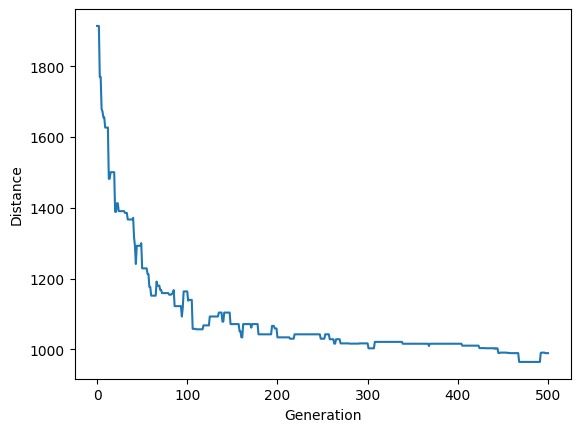

In [61]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)